In [7]:
from datasets.aro_dataset import VG_Relation

In [9]:
! pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-u5ukv0xw
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-u5ukv0xw
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done


In [8]:
dataset = VG_Relation(image_preprocess=None)
entry_1 = dataset[0]

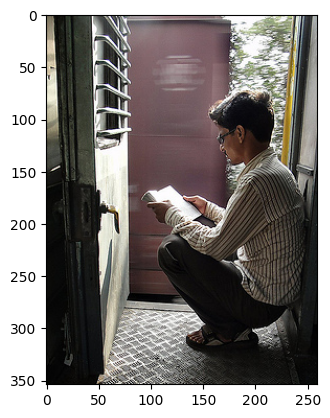

In [15]:
import matplotlib.pyplot as plt 
plt.imshow(entry_1['image'])

In [5]:
print(entry_1['query'])

Which caption is correct: the shirt is to the left of the door or the door is to the left of the shirt?


In [7]:
import matplotlib.pyplot as plt 
from PIL import ImageDraw 
draw = ImageDraw.Draw(entry_1['image'])
draw.ellipse([150,200,250,250],outline='red')

In [9]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [10]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

In [56]:
from PIL import Image, ImageColor, ImageDraw, ImageFont
input_point = np.array([[10,100]])
input_label = np.array([1])

predictor = SamPredictor(sam)
image = cv2.imread(entry_1['sample_path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
top_idx = np.argmax(scores)
selected_mask_1 = masks[top_idx]
selected_mask_1 = selected_mask_1.astype(np.uint8)
print(selected_mask_1)

color = np.array([0,255,0], dtype='uint8')
masked_img = np.where(selected_mask_1[...,None], color, image)
out = cv2.addWeighted(image, 0.8, masked_img, 0.2,0)







[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
input_point = np.array([[250,200]])
input_label = np.array([1])

predictor = SamPredictor(sam)
image = cv2.imread(entry_1['sample_path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)
top_idx = np.argmax(scores)
selected_mask_2 = masks[top_idx]
selected_mask_2 = selected_mask_2.astype(np.uint8)

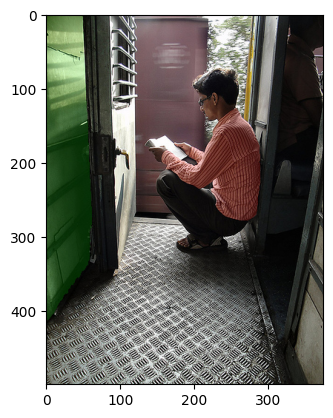

In [63]:
color = np.array([255,0,0], dtype='uint8')
masked_img_2 = np.where(selected_mask_2[...,None], color, image)
out_1 = cv2.addWeighted(out, 0.8, masked_img_2, 0.2,0)
plt.imshow(out_1)

In [31]:
import cv2
image = cv2.imread(entry_1['sample_path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)


In [32]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)


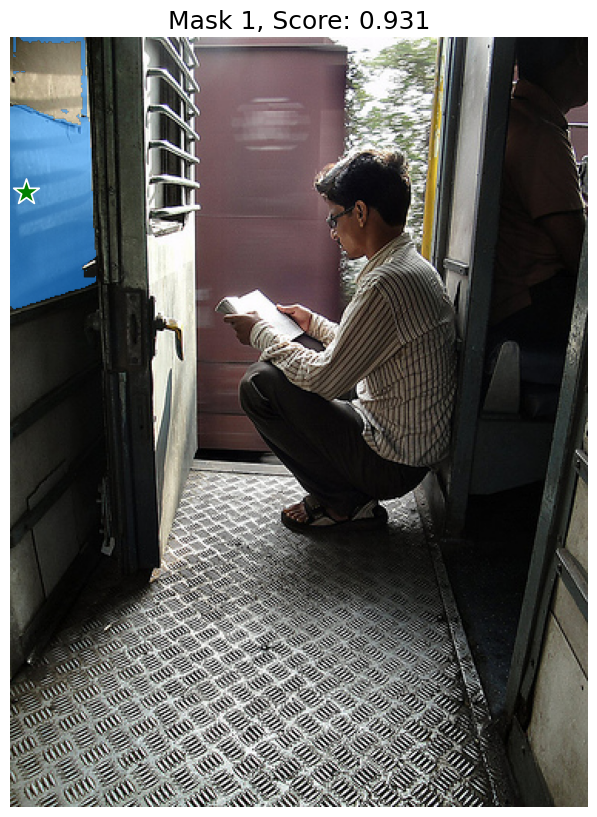

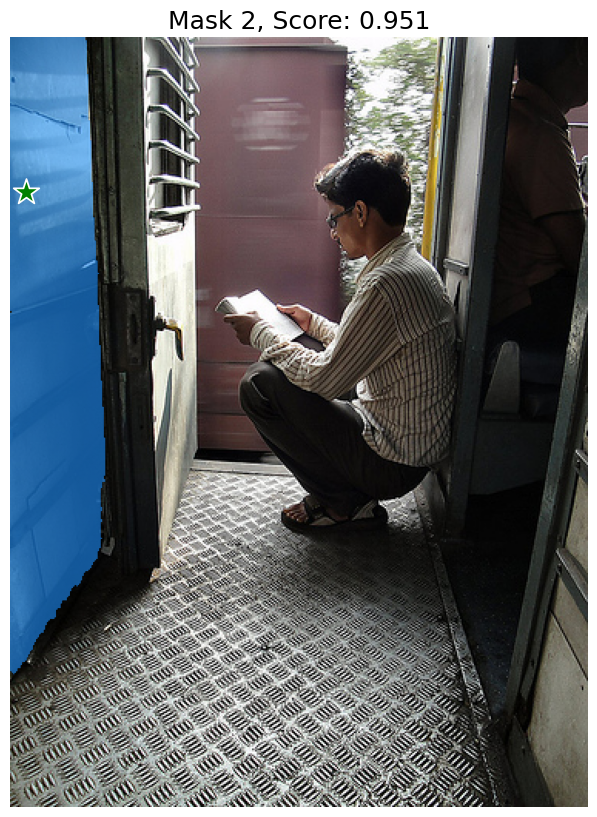

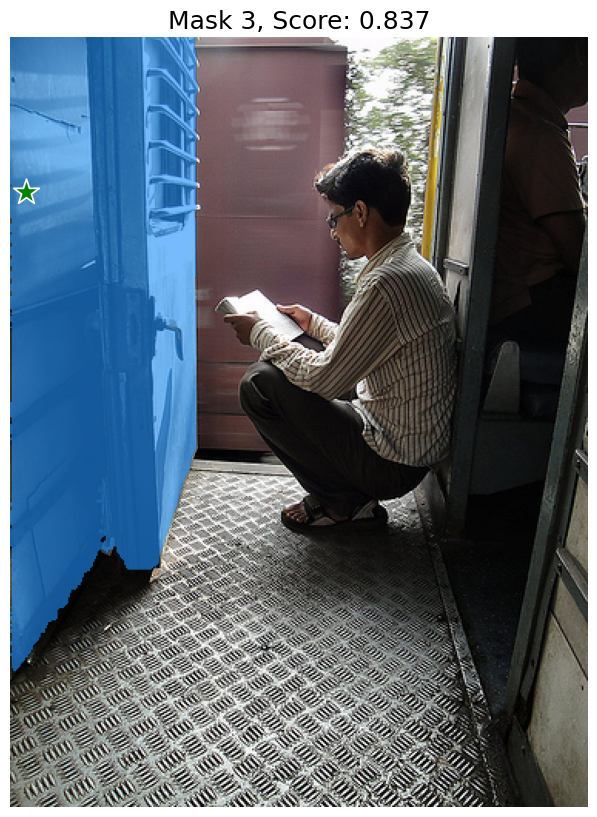

In [33]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  
  

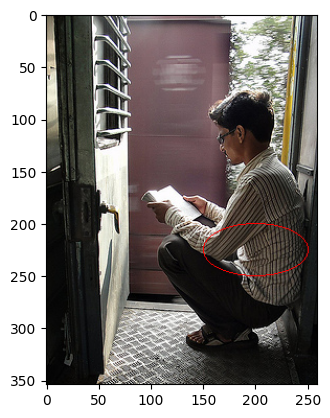

In [8]:
plt.imshow(entry_1['image'])